In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [6]:
tokenizer = Tokenizer()

data = open('/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1


input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)



max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))


predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [7]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

In [10]:
 history = model.fit(predictors, label, epochs=150, verbose=1)

Epoch 1/150
484/484 [==============================] - 6s 13ms/step - loss: 2.4868 - accuracy: 0.5105
Epoch 2/150
484/484 [==============================] - 6s 12ms/step - loss: 2.4447 - accuracy: 0.5229
Epoch 3/150
484/484 [==============================] - 6s 12ms/step - loss: 2.4019 - accuracy: 0.5336
Epoch 4/150
484/484 [==============================] - 6s 13ms/step - loss: 2.3594 - accuracy: 0.5426
Epoch 5/150
484/484 [==============================] - 6s 13ms/step - loss: 2.3256 - accuracy: 0.5493
Epoch 6/150
484/484 [==============================] - 6s 12ms/step - loss: 2.2713 - accuracy: 0.5600
Epoch 7/150
484/484 [==============================] - 6s 12ms/step - loss: 2.2496 - accuracy: 0.5636
Epoch 8/150
484/484 [==============================] - 6s 12ms/step - loss: 2.2180 - accuracy: 0.5712
Epoch 9/150
484/484 [==============================] - 6s 12ms/step - loss: 2.1761 - accuracy: 0.5831
Epoch 10/150
484/484 [==============================] - 6s 12ms/step - loss: 2.135

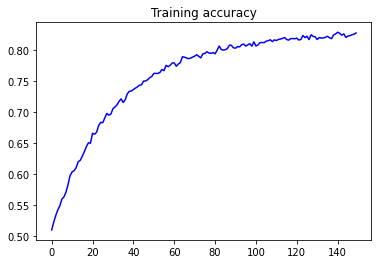

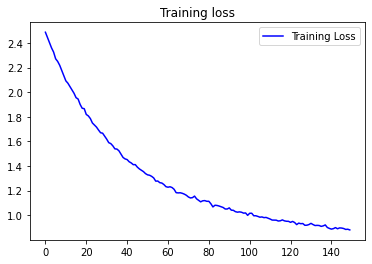

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [13]:
seed_text = "Love is my only hope, accept the truth"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Love is my only hope, accept the truth of blood and brain to crave light expense of skill about happy wantonness speechless chest lie new ill chary hid wide shade decrease expired speechless brow loving go cold taken wide parts ill heaven torn press gladly cured go lives well of seen held nought back up outworn swerving forth about about about lust desire did abide burn torn due bearing of life hell bettering skill true ' oppress'd so o'er gladly held expired gay disdain afloat lust ill endured pace mother mother lived being pain go a edge of end did play to felt back lust o'er gay fitted
